# Tensor Board

### install <br/>
```
conda install tensorboard
```

### run <br/>
```
tensorboard --logdir=runs
```

14_feedforward 코드를 이용해서 tensorboard 사용법 배우기

torch.Size([100, 1, 28, 28]) torch.Size([100])


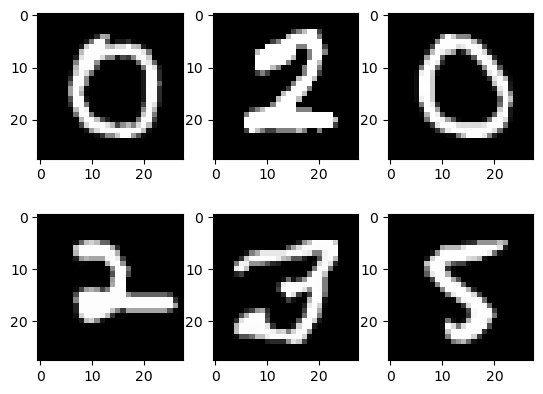

In [4]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import sys

# tensorboard
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter("runs/mnist")

# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters
input_size = 784            # 28x28=784
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# import MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                        transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                        transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# example data
samples, labels = next(iter(train_loader))
print(samples.shape, labels.shape)

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')

plt.show()
img_grid = torchvision.utils.make_grid(samples)
writer.add_image('mnist_images',img_grid)

writer.close() # flush